# CJ 대한통운 서울 내 배송 종류별 배송량 시각화

## csv 파일 하나로 연습

### 데이터 불러오기

In [238]:
import pandas as pd
PATH = "C:/Users/Admin/Desktop/빅데이터 분석가 양성과정/Data Visualisation/실습/CJ 대한통운/"
doc = pd.read_csv(PATH + "6-4)DWC_KXLCLS_OD_DAY_SEOULGU_SEOULGU_2101.csv", encoding='cp949')
doc.head()

,DL_YMD,SEND_CTPV_NM,SEND_CTPV_CD,SEND_CTGG_NM,SEND_CTGG_CD,REC_CTPV_NM,REC_CTPV_CD,REC_CTGG_NM,REC_CTGG_CD,E_C_01,E_C_02,E_C_03,E_C_04,E_C_05,E_C_06,E_C_07,E_C_08,E_C_09,E_C_10,E_C_11
0,20210115,서울특별시,11.0,양천구,11470.0,서울특별시,11.0,종로구,11110.0,4.0,23.0,0.0,8.0,37.0,3.0,11.0,0.0,22.0,12.0,5.0
1,20210115,서울특별시,11.0,양천구,11470.0,서울특별시,11.0,중구,11140.0,5.0,31.0,9.0,10.0,29.0,4.0,19.0,0.0,38.0,8.0,10.0
2,20210115,서울특별시,11.0,양천구,11470.0,서울특별시,11.0,용산구,11170.0,0.0,28.0,3.0,29.0,45.0,5.0,15.0,3.0,22.0,12.0,25.0
3,20210115,서울특별시,11.0,양천구,11470.0,서울특별시,11.0,성동구,11200.0,0.0,45.0,5.0,24.0,35.0,3.0,39.0,5.0,57.0,20.0,25.0
4,20210115,서울특별시,11.0,양천구,11470.0,서울특별시,11.0,광진구,11215.0,0.0,27.0,3.0,17.0,56.0,8.0,29.0,0.0,31.0,12.0,32.0


### 필요한 컬럼만 뽑아오기

In [239]:
doc = doc[['DL_YMD', 'E_C_01', 'E_C_02', 'E_C_03', 'E_C_04', 'E_C_05', 'E_C_06', 'E_C_07', 'E_C_08', 'E_C_09', 'E_C_10', 'E_C_11']]

### 컬럼명 변경

In [240]:
doc.rename(columns = {
    'DL_YMD' : '일자',
    'E_C_01' : '가구/인테리어',
    'E_C_02' : '기타',
    'E_C_03' : '도서/음반',
    'E_C_04' : '디지털/가전',
    'E_C_05' : '생활/건강',
    'E_C_06' : '스포츠/레저',
    'E_C_07' : '식품',
    'E_C_08' : '출산/육아',
    'E_C_09' : '패션/의류',
    'E_C_10' : '패션잡화',
    'E_C_11' : '화장품/미용'}, inplace = True)

In [241]:
doc

,일자,가구/인테리어,기타,도서/음반,디지털/가전,생활/건강,스포츠/레저,식품,출산/육아,패션/의류,패션잡화,화장품/미용
0,20210115,4.0,23.0,0.0,8.0,37.0,3.0,11.0,0.0,22.0,12.0,5.0
1,20210115,5.0,31.0,9.0,10.0,29.0,4.0,19.0,0.0,38.0,8.0,10.0
2,20210115,0.0,28.0,3.0,29.0,45.0,5.0,15.0,3.0,22.0,12.0,25.0
3,20210115,0.0,45.0,5.0,24.0,35.0,3.0,39.0,5.0,57.0,20.0,25.0
4,20210115,0.0,27.0,3.0,17.0,56.0,8.0,29.0,0.0,31.0,12.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18412,20210124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18413,20210124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18414,20210124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18415,20210124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 일자 컬럼을 날짜 데이터로 변경

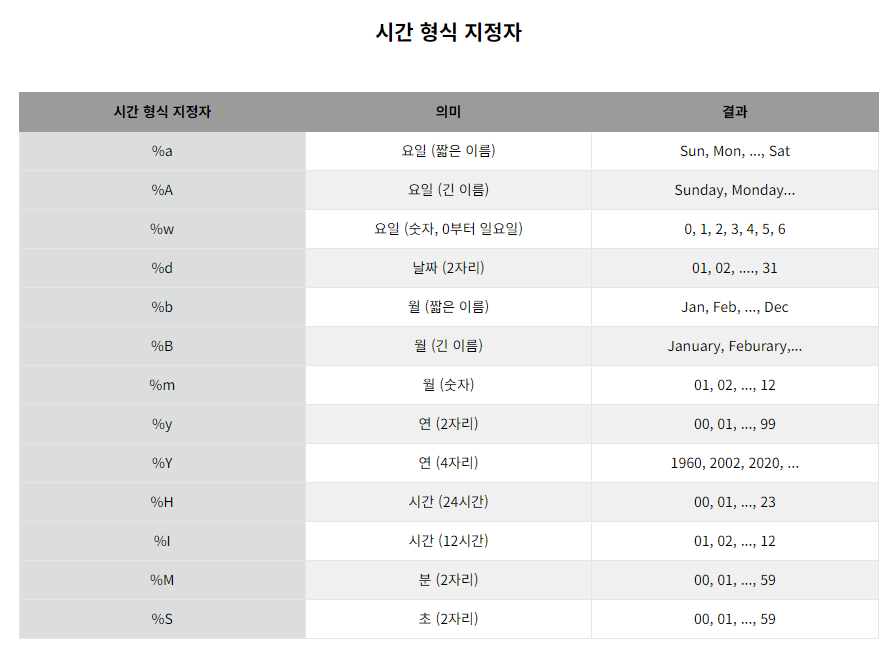

In [242]:
doc['일자'] = pd.to_datetime(doc['일자'], format = '%Y%m%d')

### 일자별로 중복된 데이터 합치기

In [243]:
doc = doc.groupby('일자').sum()

In [244]:
doc

,가구/인테리어,기타,도서/음반,디지털/가전,생활/건강,스포츠/레저,식품,출산/육아,패션/의류,패션잡화,화장품/미용
일자,,,,,,,,,,,
2021-01-01,7.0,721.0,4079.0,601.0,267.0,299.0,1668.0,563.0,333.0,295.0,363.0
2021-01-02,523.0,11221.0,6244.0,3833.0,4852.0,605.0,7050.0,3321.0,12787.0,5363.0,2512.0
2021-01-03,779.0,550.0,3875.0,1328.0,2470.0,104.0,3875.0,450.0,1870.0,931.0,2295.0
2021-01-04,18985.0,78976.0,29215.0,68933.0,95248.0,11228.0,76580.0,11381.0,89541.0,41212.0,47606.0
2021-01-05,10982.0,53334.0,20917.0,41131.0,52227.0,5469.0,47947.0,8449.0,60293.0,27995.0,24987.0
2021-01-06,8581.0,45494.0,19059.0,35580.0,41768.0,4857.0,38822.0,5833.0,48962.0,23257.0,22162.0
2021-01-07,8002.0,41940.0,17988.0,33633.0,41282.0,4792.0,33647.0,5184.0,44561.0,21336.0,18876.0
2021-01-08,7448.0,43758.0,12119.0,34635.0,42374.0,4818.0,35153.0,5604.0,45163.0,21685.0,20043.0
2021-01-09,360.0,10667.0,6651.0,3069.0,4085.0,825.0,3706.0,1167.0,10248.0,3528.0,4079.0


### 일자를 컬럼으로 보내기 위해 전치

In [245]:
doc = doc.transpose()

In [246]:
doc

일자,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06,2021-01-07,2021-01-08,2021-01-09,2021-01-10,...,2021-01-22,2021-01-23,2021-01-24,2021-01-25,2021-01-26,2021-01-27,2021-01-28,2021-01-29,2021-01-30,2021-01-31
가구/인테리어,7.0,523.0,779.0,18985.0,10982.0,8581.0,8002.0,7448.0,360.0,85.0,...,6617.0,321.0,173.0,14022.0,8118.0,7418.0,7028.0,6177.0,646.0,30.0
기타,721.0,11221.0,550.0,78976.0,53334.0,45494.0,41940.0,43758.0,10667.0,1312.0,...,39842.0,14796.0,821.0,67895.0,46764.0,46209.0,45366.0,43328.0,15826.0,2801.0
도서/음반,4079.0,6244.0,3875.0,29215.0,20917.0,19059.0,17988.0,12119.0,6651.0,4678.0,...,12830.0,4456.0,1895.0,19367.0,15346.0,17835.0,14201.0,14099.0,5170.0,1517.0
디지털/가전,601.0,3833.0,1328.0,68933.0,41131.0,35580.0,33633.0,34635.0,3069.0,885.0,...,28536.0,2479.0,415.0,51734.0,32602.0,30043.0,28470.0,24903.0,1814.0,431.0
생활/건강,267.0,4852.0,2470.0,95248.0,52227.0,41768.0,41282.0,42374.0,4085.0,2069.0,...,42154.0,6429.0,6274.0,75898.0,47584.0,46158.0,43946.0,38858.0,4493.0,2455.0
스포츠/레저,299.0,605.0,104.0,11228.0,5469.0,4857.0,4792.0,4818.0,825.0,112.0,...,3258.0,658.0,225.0,6744.0,4063.0,3583.0,3506.0,3228.0,355.0,78.0
식품,1668.0,7050.0,3875.0,76580.0,47947.0,38822.0,33647.0,35153.0,3706.0,3031.0,...,35272.0,4524.0,2874.0,66795.0,49395.0,54033.0,52761.0,56093.0,22405.0,22040.0
출산/육아,563.0,3321.0,450.0,11381.0,8449.0,5833.0,5184.0,5604.0,1167.0,603.0,...,4537.0,614.0,410.0,9889.0,6016.0,6371.0,5289.0,4386.0,1272.0,368.0
패션/의류,333.0,12787.0,1870.0,89541.0,60293.0,48962.0,44561.0,45163.0,10248.0,2318.0,...,41239.0,10144.0,3813.0,69196.0,48388.0,44030.0,41217.0,38345.0,7744.0,1537.0
패션잡화,295.0,5363.0,931.0,41212.0,27995.0,23257.0,21336.0,21685.0,3528.0,1457.0,...,17557.0,4977.0,1493.0,32028.0,20438.0,18530.0,17053.0,15996.0,2486.0,806.0


### 데이터 타입을 정수로 변경

In [247]:
doc = doc.astype('int64')

In [248]:
doc

일자,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06,2021-01-07,2021-01-08,2021-01-09,2021-01-10,...,2021-01-22,2021-01-23,2021-01-24,2021-01-25,2021-01-26,2021-01-27,2021-01-28,2021-01-29,2021-01-30,2021-01-31
가구/인테리어,7,523,779,18985,10982,8581,8002,7448,360,85,...,6617,321,173,14022,8118,7418,7028,6177,646,30
기타,721,11221,550,78976,53334,45494,41940,43758,10667,1312,...,39842,14796,821,67895,46764,46209,45366,43328,15826,2801
도서/음반,4079,6244,3875,29215,20917,19059,17988,12119,6651,4678,...,12830,4456,1895,19367,15346,17835,14201,14099,5170,1517
디지털/가전,601,3833,1328,68933,41131,35580,33633,34635,3069,885,...,28536,2479,415,51734,32602,30043,28470,24903,1814,431
생활/건강,267,4852,2470,95248,52227,41768,41282,42374,4085,2069,...,42154,6429,6274,75898,47584,46158,43946,38858,4493,2455
스포츠/레저,299,605,104,11228,5469,4857,4792,4818,825,112,...,3258,658,225,6744,4063,3583,3506,3228,355,78
식품,1668,7050,3875,76580,47947,38822,33647,35153,3706,3031,...,35272,4524,2874,66795,49395,54033,52761,56093,22405,22040
출산/육아,563,3321,450,11381,8449,5833,5184,5604,1167,603,...,4537,614,410,9889,6016,6371,5289,4386,1272,368
패션/의류,333,12787,1870,89541,60293,48962,44561,45163,10248,2318,...,41239,10144,3813,69196,48388,44030,41217,38345,7744,1537
패션잡화,295,5363,931,41212,27995,23257,21336,21685,3528,1457,...,17557,4977,1493,32028,20438,18530,17053,15996,2486,806


### 일자 라는 인덱스가 남아서 다시 정리

In [249]:
columns = doc.columns
columns = list(columns)

In [250]:
doc.columns = columns

In [251]:
doc

,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06,2021-01-07,2021-01-08,2021-01-09,2021-01-10,...,2021-01-22,2021-01-23,2021-01-24,2021-01-25,2021-01-26,2021-01-27,2021-01-28,2021-01-29,2021-01-30,2021-01-31
가구/인테리어,7,523,779,18985,10982,8581,8002,7448,360,85,...,6617,321,173,14022,8118,7418,7028,6177,646,30
기타,721,11221,550,78976,53334,45494,41940,43758,10667,1312,...,39842,14796,821,67895,46764,46209,45366,43328,15826,2801
도서/음반,4079,6244,3875,29215,20917,19059,17988,12119,6651,4678,...,12830,4456,1895,19367,15346,17835,14201,14099,5170,1517
디지털/가전,601,3833,1328,68933,41131,35580,33633,34635,3069,885,...,28536,2479,415,51734,32602,30043,28470,24903,1814,431
생활/건강,267,4852,2470,95248,52227,41768,41282,42374,4085,2069,...,42154,6429,6274,75898,47584,46158,43946,38858,4493,2455
스포츠/레저,299,605,104,11228,5469,4857,4792,4818,825,112,...,3258,658,225,6744,4063,3583,3506,3228,355,78
식품,1668,7050,3875,76580,47947,38822,33647,35153,3706,3031,...,35272,4524,2874,66795,49395,54033,52761,56093,22405,22040
출산/육아,563,3321,450,11381,8449,5833,5184,5604,1167,603,...,4537,614,410,9889,6016,6371,5289,4386,1272,368
패션/의류,333,12787,1870,89541,60293,48962,44561,45163,10248,2318,...,41239,10144,3813,69196,48388,44030,41217,38345,7744,1537
패션잡화,295,5363,931,41212,27995,23257,21336,21685,3528,1457,...,17557,4977,1493,32028,20438,18530,17053,15996,2486,806


### 일자별로 정렬

In [252]:
final_doc = doc.reindex(sorted(doc.columns, key=pd.to_datetime), axis=1)

### 품목별 누적합 구하기

In [253]:
final_doc = final_doc.cumsum(axis = 1)

In [254]:
final_doc

,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06,2021-01-07,2021-01-08,2021-01-09,2021-01-10,...,2021-01-22,2021-01-23,2021-01-24,2021-01-25,2021-01-26,2021-01-27,2021-01-28,2021-01-29,2021-01-30,2021-01-31
가구/인테리어,7,530,1309,20294,31276,39857,47859,55307,55667,55752,...,149489,149810,149983,164005,172123,179541,186569,192746,193392,193422
기타,721,11942,12492,91468,144802,190296,232236,275994,286661,287973,...,794568,809364,810185,878080,924844,971053,1016419,1059747,1075573,1078374
도서/음반,4079,10323,14198,43413,64330,83389,101377,113496,120147,124825,...,296522,300978,302873,322240,337586,355421,369622,383721,388891,390408
디지털/가전,601,4434,5762,74695,115826,151406,185039,219674,222743,223628,...,594986,597465,597880,649614,682216,712259,740729,765632,767446,767877
생활/건강,267,5119,7589,102837,155064,196832,238114,280488,284573,286642,...,823746,830175,836449,912347,959931,1006089,1050035,1088893,1093386,1095841
스포츠/레저,299,904,1008,12236,17705,22562,27354,32172,32997,33109,...,83710,84368,84593,91337,95400,98983,102489,105717,106072,106150
식품,1668,8718,12593,89173,137120,175942,209589,244742,248448,251479,...,698479,703003,705877,772672,822067,876100,928861,984954,1007359,1029399
출산/육아,563,3884,4334,15715,24164,29997,35181,40785,41952,42555,...,109289,109903,110313,120202,126218,132589,137878,142264,143536,143904
패션/의류,333,13120,14990,104531,164824,213786,258347,303510,313758,316076,...,852383,862527,866340,935536,983924,1027954,1069171,1107516,1115260,1116797
패션잡화,295,5658,6589,47801,75796,99053,120389,142074,145602,147059,...,393183,398160,399653,431681,452119,470649,487702,503698,506184,506990


### 파일 내보내기

In [165]:
final_doc.to_csv("CJ 대한통운/parcel.csv")

## 함수로 정리하여 최종 정리 

In [1]:
import pandas as pd

def create_dateframe(filename):
    doc = pd.read_csv(PATH + filename, encoding='cp949')  # 1. csv 파일 읽기
    doc = doc[['DL_YMD', 'E_C_01', 'E_C_02', 'E_C_03', 'E_C_04', 'E_C_05', 'E_C_06', 'E_C_07', 'E_C_08', 'E_C_09', 'E_C_10', 'E_C_11']]  # 2. 특정 컬럼만 선택해서 데이터프레임 만들기
    doc.rename(columns = {
    'DL_YMD' : '일자',
    'E_C_01' : '가구/인테리어',
    'E_C_02' : '기타',
    'E_C_03' : '도서/음반',
    'E_C_04' : '디지털/가전',
    'E_C_05' : '생활/건강',
    'E_C_06' : '스포츠/레저',
    'E_C_07' : '식품',
    'E_C_08' : '출산/육아',
    'E_C_09' : '패션/의류',
    'E_C_10' : '패션잡화',
    'E_C_11' : '화장품/미용'}, inplace = True)  # 3. 칼럼 이름 바꾸기
    doc['일자'] = pd.to_datetime(doc['일자'], format = '%Y%m%d') # 4. 날짜 데이터로 바꾸기
    doc = doc.groupby('일자').sum()   # 5. 특정 컬럼으로 중복된 데이터를 합치기
    doc = doc.transpose()   # 6. 전치
    doc = doc.astype('int64') # 7. 데이터 타입 변경하기
    columns = doc.columns
    columns = list(columns)
    doc.columns = columns # 컬럼명 날짜로 바꾸기
    return doc

In [2]:
import os

def generate_dateframe_by_path(PATH):

    file_list, csv_list = os.listdir(PATH), list()
    first_doc = True
    for file in file_list:
        if file.split(".")[-1] == 'csv':
            csv_list.append(file)
    csv_list.sort()
    
    for file in csv_list:
        doc = create_dateframe(file)
        if first_doc:
            final_doc, first_doc = doc, False
        else:
            final_doc = pd.merge(final_doc, doc, how='outer', left_index=True, right_index=True)

    final_doc = final_doc.reindex(sorted(final_doc.columns, key=pd.to_datetime), axis=1)
    final_doc = final_doc.cumsum(axis = 1)
    return final_doc

In [3]:
PATH = 'C:/Users/Admin/Desktop/빅데이터 분석가 양성과정/Data Visualisation/실습/CJ 대한통운/'
doc = generate_dateframe_by_path(PATH)
doc

,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06,2021-01-07,2021-01-08,2021-01-09,2021-01-10,...,2023-05-22,2023-05-23,2023-05-24,2023-05-25,2023-05-26,2023-05-27,2023-05-28,2023-05-29,2023-05-30,2023-05-31
가구/인테리어,7,530,1309,20294,31276,39857,47859,55307,55667,55752,...,3951625,3955913,3959777,3963444,3966940,3966943,3966943,3967052,3975649,3980734
기타,721,11942,12492,91468,144802,190296,232236,275994,286661,287973,...,29443523,29472049,29498142,29524112,29549213,29549387,29549442,29551643,29600016,29630285
도서/음반,4079,10323,14198,43413,64330,83389,101377,113496,120147,124825,...,7512477,7522456,7532293,7541852,7550930,7550930,7550930,7551072,7569686,7581187
디지털/가전,601,4434,5762,74695,115826,151406,185039,219674,222743,223628,...,15823018,15842263,15859203,15875111,15890093,15890099,15890108,15892400,15925198,15944095
생활/건강,267,5119,7589,102837,155064,196832,238114,280488,284573,286642,...,21927783,21954476,21980908,22003835,22024256,22024394,22024509,22025950,22072474,22100717
스포츠/레저,299,904,1008,12236,17705,22562,27354,32172,32997,33109,...,3295901,3301565,3306283,3310406,3313757,3313770,3313770,3314124,3323801,3329534
식품,1668,8718,12593,89173,137120,175942,209589,244742,248448,251479,...,20533625,20556288,20577781,20598889,20612835,20613181,20613475,20617158,20659047,20681138
출산/육아,563,3884,4334,15715,24164,29997,35181,40785,41952,42555,...,3041345,3045075,3048694,3051647,3054058,3054058,3054079,3054101,3060489,3064032
패션/의류,333,13120,14990,104531,164824,213786,258347,303510,313758,316076,...,40188003,40267681,40338777,40403865,40467721,40468052,40468188,40475299,40594933,40673240
패션잡화,295,5658,6589,47801,75796,99053,120389,142074,145602,147059,...,15386875,15412113,15433652,15453691,15472457,15473191,15473428,15475583,15516796,15542624


In [276]:
doc.to_csv("CJ 대한통운/최종파일/parcel.csv")

# 최종본
https://app.flourish.studio/visualisation/14830057/edit